In [ ]:
#This is just an extra script I wrote to practice reading in and analyzing data.
#I found a data set on Kaggle about the highest paid athletes since 1990 and figured it'd be an interesting
#csv to look at.

In [10]:
import pandas as pd
import seaborn as sns

In [3]:
salary_df=pd.read_csv(r'C:\Users\pad39\Downloads\Forbes Richest Atheletes (Forbes Richest Athletes 1990-2019).csv')
salary_df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
286,287,Russell Wilson,USA,6,??,American Football,2019,89.5
287,288,Aaron Rogers,USA,7,??,American Football,2019,89.3
288,289,LeBron James,USA,8,6,Basketball,2019,89.0
289,290,Stephen Curry,USA,9,8,Basketball,2019,79.8


In [5]:
salary_df.shape

(291, 8)

In [8]:
#Using the decribe function we find that the average salary among the 291 top paid athletes is $44.27million
#Additionally we see that the standard deviation in salaries is 33.26 so this data set has a very large spread.
#the lower 25 percentile is $23 million and the 75 percentile is $54.65 million with a median of $38million
#notice that the median is smaller than the mean therefore this datas is likely skewed right.
salary_df['earnings ($ million)'].describe()

count    291.000000
mean      44.265292
std       33.212613
min        8.100000
25%       23.500000
50%       38.000000
75%       54.650000
max      300.000000
Name: earnings ($ million), dtype: float64

In [27]:
#note in order to get it do desplay the row of of the max salary earned I had to use the idxmax function to return 
#the index of the row with the max salary and then use the iloc function to input that index and display the row function
# we find that Floyd Mayweather is the top earning athlete from 1990-2019 is a boxer from the USA
#he earned this in 2019
salary_df.iloc[salary_df['earnings ($ million)'].idxmax()]


S.NO                                 242
Name                    Floyd Mayweather
Nationality                          USA
Current Rank                           1
Previous Year Rank                     1
Sport                             boxing
Year                                2015
earnings ($ million)                 300
Sports                            boxing
Name: 241, dtype: object

In [11]:
salary_df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [23]:
#upon inspecting the graph origionally I found there were issues with the 'Sport' columns data because 
#becasue some values were capitalized they were classified as a different sport and some "sports" were labaled 
#by they professional leagues so I had to make everything in that columns lowercase with the str.lower function and then
#to change the league names into their sports I had to use the replace function. All values in the first bracket are the 
#old values and all the values in the second bracket are the new ones
salary_df['Sport']=salary_df['Sport'].str.lower()
salary_df['Sport']=salary_df['Sport'].replace(['nfl','nba', 'f1 racing', 'nascar', 'ice hockey']
                                               ,['american football', 'basketball', 'f1 motorsports', 'auto racing (nascar)', 'hockey'])

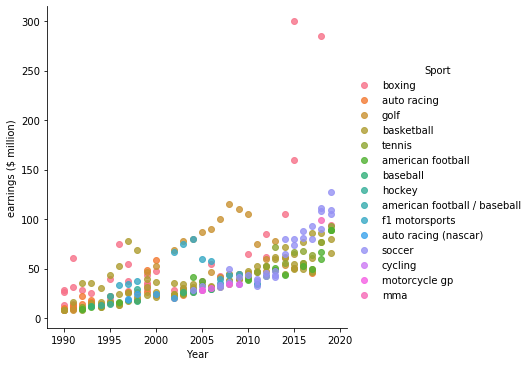

In [24]:
# as we can see from the graph the highest salaries seem to be from boxers with soccer being the runner ups
#additionally we see that from 1990 to 2019 salaries steadily increase for inflation
sns.lmplot(x='Year',y='earnings ($ million)', data=salary_df,
           hue='Sport', fit_reg=False)